In [1]:
! pip install chembl_webresource_client


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 6.7 MB/s eta 0:00:00
  Attempting uninstall: attrs
    Found existing installation: attrs 23.1.0
    Uninstalling attrs-23.1.0:
      Successfully uninstalled attrs-23.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
jsonschema 4.19.1 requires attrs>=22.2.0, but you have attrs 21.4.0 which is incompatible.
referencing 0.30.2 requires attrs>=22.2.0, but you have attrs 21.4.0 which is incompatible.


In [2]:
!pip install scikit-learn

In [3]:
pip install scikit-learn --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 28.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [4]:
import pandas as pd
from chembl_webresource_client.new_client import new_client

In [5]:
target = new_client.target
target_query = target.search('glucosidase')
targets = pd.DataFrame.from_dict(target_query)
targets[targets['organism']=='Homo sapiens'] # filter target protein for humans

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
1,"[{'xref_id': 'Q14697', 'xref_name': None, 'xre...",Homo sapiens,Neutral alpha-glucosidase AB,15.0,False,CHEMBL2519,"[{'accession': 'Q14697', 'component_descriptio...",SINGLE PROTEIN,9606
2,"[{'xref_id': 'Q13724', 'xref_name': None, 'xre...",Homo sapiens,Mannosyl-oligosaccharide glucosidase,15.0,False,CHEMBL4684,"[{'accession': 'Q13724', 'component_descriptio...",SINGLE PROTEIN,9606
3,"[{'xref_id': 'Acid_alpha-glucosidase', 'xref_n...",Homo sapiens,Lysosomal alpha-glucosidase,14.0,False,CHEMBL2608,"[{'accession': 'P10253', 'component_descriptio...",SINGLE PROTEIN,9606
5,[],Homo sapiens,Alpha glucosidase,14.0,False,CHEMBL3833502,"[{'accession': 'O43451', 'component_descriptio...",PROTEIN FAMILY,9606
6,"[{'xref_id': 'Q9H227', 'xref_name': None, 'xre...",Homo sapiens,Beta-glucosidase cytosolic,13.0,False,CHEMBL3865,"[{'accession': 'Q9H227', 'component_descriptio...",SINGLE PROTEIN,9606
12,"[{'xref_id': 'P35573', 'xref_name': None, 'xre...",Homo sapiens,Glycogen debranching enzyme,13.0,False,CHEMBL5272,"[{'accession': 'P35573', 'component_descriptio...",SINGLE PROTEIN,9606
15,"[{'xref_id': 'GANC', 'xref_name': None, 'xref_...",Homo sapiens,Neutral alpha-glucosidase C,12.0,False,CHEMBL2520,"[{'accession': 'Q8TET4', 'component_descriptio...",SINGLE PROTEIN,9606
16,"[{'xref_id': 'Q9HCG7', 'xref_name': None, 'xre...",Homo sapiens,Beta-glucosidase,12.0,False,CHEMBL3761,"[{'accession': 'Q9HCG7', 'component_descriptio...",SINGLE PROTEIN,9606
33,"[{'xref_id': 'O43451', 'xref_name': None, 'xre...",Homo sapiens,Maltase-glucoamylase,11.0,False,CHEMBL2074,"[{'accession': 'O43451', 'component_descriptio...",SINGLE PROTEIN,9606
38,[],Homo sapiens,Glucocerebrosidase GBA1/GBA2,11.0,False,CHEMBL4106172,"[{'accession': 'P04062', 'component_descriptio...",PROTEIN FAMILY,9606


In [6]:
glucosidase=targets.target_chembl_id[5]
glucosidase#confirm chembl id

'CHEMBL3833502'

In [7]:
activity = new_client.activity
res = activity.filter(target_chembl_id=glucosidase).filter(standard_type="IC50")
raw_df= pd.DataFrame(res)
raw_df

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,18328968,[],CHEMBL4135957,Inhibition of alpha-glucosidase (unknown origi...,B,None,None,BAO_0000190,...,Homo sapiens,Alpha glucosidase,9606,None,None,IC50,uM,UO_0000065,None,442.4
1,None,None,18328969,[],CHEMBL4135957,Inhibition of alpha-glucosidase (unknown origi...,B,None,None,BAO_0000190,...,Homo sapiens,Alpha glucosidase,9606,None,None,IC50,uM,UO_0000065,None,80.6
2,None,Not Determined,18481169,[],CHEMBL4184972,Inhibition of alpha-glucosidase (unknown origi...,B,None,None,BAO_0000190,...,Homo sapiens,Alpha glucosidase,9606,None,None,IC50,None,None,None,None
3,None,Not Determined,18481170,[],CHEMBL4184972,Inhibition of alpha-glucosidase (unknown origi...,B,None,None,BAO_0000190,...,Homo sapiens,Alpha glucosidase,9606,None,None,IC50,None,None,None,None
4,None,Not Determined,18481171,[],CHEMBL4184972,Inhibition of alpha-glucosidase (unknown origi...,B,None,None,BAO_0000190,...,Homo sapiens,Alpha glucosidase,9606,None,None,IC50,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,None,None,19280505,[],CHEMBL4409073,Inhibition of alpha-glucosidase (unknown origin),B,None,None,BAO_0000190,...,Homo sapiens,Alpha glucosidase,9606,None,None,IC50,uM,UO_0000065,None,2.04
601,None,None,19280506,[],CHEMBL4409073,Inhibition of alpha-glucosidase (unknown origin),B,None,None,BAO_0000190,...,Homo sapiens,Alpha glucosidase,9606,None,None,IC50,uM,UO_0000065,None,3.3
602,None,None,19280507,[],CHEMBL4409073,Inhibition of alpha-glucosidase (unknown origin),B,None,None,BAO_0000190,...,Homo sapiens,Alpha glucosidase,9606,None,None,IC50,uM,UO_0000065,None,3.41
603,None,None,19280508,[],CHEMBL4409073,Inhibition of alpha-glucosidase (unknown origin),B,None,None,BAO_0000190,...,Homo sapiens,Alpha glucosidase,9606,None,None,IC50,uM,UO_0000065,None,2.6


In [8]:
clean_df=raw_df.dropna(subset=['standard_value','canonical_smiles']) #drop null values
print(clean_df[['standard_value','canonical_smiles']].isna().to_string()) #check

     standard_value  canonical_smiles
0             False             False
1             False             False
20            False             False
21            False             False
22            False             False
23            False             False
26            False             False
29            False             False
30            False             False
31            False             False
33            False             False
34            False             False
35            False             False
36            False             False
37            False             False
38            False             False
39            False             False
40            False             False
41            False             False
42            False             False
43            False             False
44            False             False
45            False             False
46            False             False
47            False             False
48          

In [9]:
#extract info
refined_df = clean_df[['molecule_chembl_id','canonical_smiles','standard_value']]

In [10]:
#Check for bioactivity and add that column to refined df
bioactivity=[]
new=[]
for i in refined_df['standard_value']:
  i=float(i)
  new.append(i)
  if i<1000:
    bioactivity.append('active')
  elif i>10000:
    bioactivity.append('inactive')
  else:
    bioactivity.append('intermediate')
refined_df.drop('standard_value',1)
refined_df['standard_value']=new
refined_df['bioactivity']=bioactivity
refined_df

<ipython-input-10-de8f84aae4c9>:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  refined_df.drop('standard_value',1)
<ipython-input-10-de8f84aae4c9>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  refined_df['standard_value']=new
<ipython-input-10-de8f84aae4c9>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  refined_df['bioactivity']=bioactivity


,molecule_chembl_id,canonical_smiles,standard_value,bioactivity
0,CHEMBL404271,C[C@H]1O[C@H](O[C@H]2[C@H](O)[C@@H](O)[C@@H](O...,442400.0,inactive
1,CHEMBL4162593,COc1cc(OC)c([C@@H](OC)[C@H](C)O)cc1OC,80600.0,inactive
20,CHEMBL4212935,O=C1/C(=C/c2ccccc2)CCC/C1=C\c1cccc(O)c1,28400.0,inactive
21,CHEMBL4072055,O=C1/C(=C/c2ccccc2)CCC/C1=C\c1ccc(O)cc1,42300.0,inactive
22,CHEMBL4208759,O=C1/C(=C/c2ccccc2)CCC/C1=C\c1ccc(O)c(O)c1,20300.0,inactive
...,...,...,...,...
600,CHEMBL4472850,Cc1cc2nnn(CC(=O)c3ccc(Cl)c(Cl)c3)c2cc1C,2040.0,intermediate
601,CHEMBL4577650,Cc1cc2nnn(CC(=O)c3ccccc3O)c2cc1C,3300.0,intermediate
602,CHEMBL4443687,Cc1cc2nnn(CC(=O)c3ccccc3)c2cc1C,3410.0,intermediate
603,CHEMBL4566389,COc1ccc(C(=O)Cn2nnc3cc(C)c(C)cc32)cc1,2600.0,intermediate


In [11]:
refined_df.to_csv('glucosidase_data.csv', index=False)

In [12]:
! ls

glucosidase_data.csv  sample_data


In [13]:
import pandas as pd
df = pd.read_csv('glucosidase_data.csv')

In [14]:
!pip install rdkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 45.5 MB/s eta 0:00:00


In [15]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski


In [16]:
def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [17]:
df_lipinski = lipinski(df.canonical_smiles)
df_lipinski


,MW,LogP,NumHDonors,NumHAcceptors
0,645.608,-8.56450,14.0,19.0
1,256.298,1.78070,1.0,5.0
2,290.362,4.61220,1.0,2.0
3,290.362,4.61220,1.0,2.0
4,306.361,4.31780,2.0,3.0
...,...,...,...,...
573,334.206,4.23784,0.0,4.0
574,281.315,2.63664,1.0,5.0
575,265.316,2.93104,0.0,4.0
576,295.342,2.93964,0.0,5.0


In [18]:
refined_df = refined_df.reset_index(drop=True)
df_lipinski = df_lipinski.reset_index(drop=True)
df_concat=pd.concat([refined_df,df_lipinski],axis=1)
df_concat=df_concat[df_concat['standard_value'] != 0]
refined_df['standard_value'].describe()

count       578.000000
mean      26101.766436
std       86862.291177
min          70.000000
25%        2300.000000
50%        5300.000000
75%       20000.000000
max      942000.000000
Name: standard_value, dtype: float64

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='standard_value', ylabel='Count'>

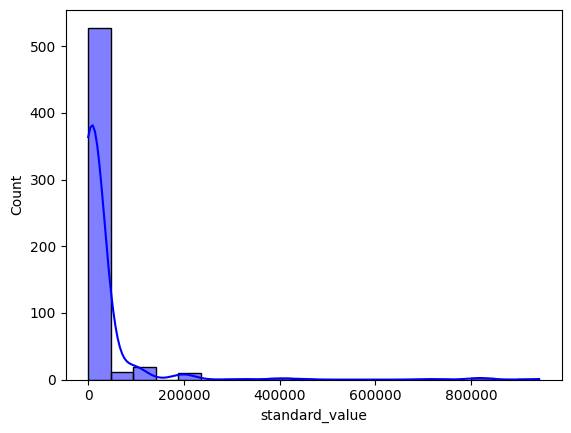

In [20]:
sns.histplot(data=df_concat['standard_value'], bins=20, kde=True, color='blue')

In [21]:
import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        if molar==0:print(i)
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)

    return x

def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i==0:print('nooooooo')
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)

    return x


<ipython-input-21-06150cd1546a>:26: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value', 1)
<ipython-input-21-06150cd1546a>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value_norm', 1)


<Axes: xlabel='pIC50', ylabel='Count'>

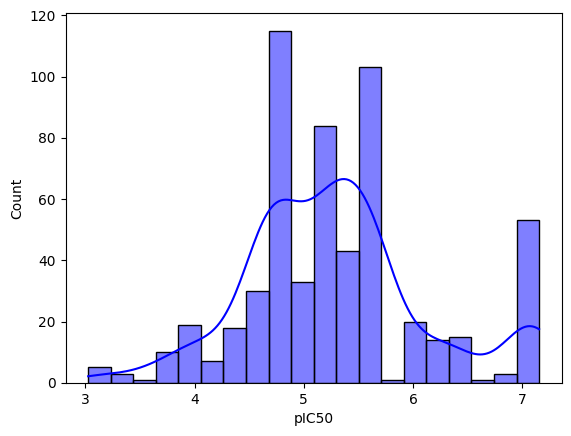

In [22]:
df_norm = norm_value(df_concat)

df_final = pIC50(df_norm)
df_final
sns.histplot(data=df_final['pIC50'], bins=20, kde=True, color='blue')


In [23]:
df_final['pIC50'].describe()


count    578.000000
mean       5.291211
std        0.838603
min        3.025949
25%        4.698970
50%        5.275724
75%        5.638272
max        7.154902
Name: pIC50, dtype: float64

In [24]:
sns.set(style='ticks')
import matplotlib.pyplot as plt

In [25]:
df_final = df_final[df_final['bioactivity'] != 'intermediate']
df_final

,molecule_chembl_id,canonical_smiles,bioactivity,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL404271,C[C@H]1O[C@H](O[C@H]2[C@H](O)[C@@H](O)[C@@H](O...,inactive,645.608,-8.5645,14.0,19.0,3.354185
1,CHEMBL4162593,COc1cc(OC)c([C@@H](OC)[C@H](C)O)cc1OC,inactive,256.298,1.7807,1.0,5.0,4.093665
2,CHEMBL4212935,O=C1/C(=C/c2ccccc2)CCC/C1=C\c1cccc(O)c1,inactive,290.362,4.6122,1.0,2.0,4.546682
3,CHEMBL4072055,O=C1/C(=C/c2ccccc2)CCC/C1=C\c1ccc(O)cc1,inactive,290.362,4.6122,1.0,2.0,4.373660
4,CHEMBL4208759,O=C1/C(=C/c2ccccc2)CCC/C1=C\c1ccc(O)c(O)c1,inactive,306.361,4.3178,2.0,3.0,4.692504
...,...,...,...,...,...,...,...,...
537,CHEMBL4454919,COc1ccc(NC(=O)Cn2cc(COc3cc(OC(C)=O)c4c(=O)c5cc...,inactive,574.546,3.7065,1.0,12.0,4.479385
538,CHEMBL4529524,COc1ccc(NC(=O)Cn2cc(COc3cc(OC(C)=O)c4c(=O)c5cc...,inactive,574.546,3.7065,1.0,12.0,4.370590
539,CHEMBL4515488,COc1ccc(NC(=O)Cn2cc(COc3cc(OC(C)=O)c4c(=O)c5cc...,inactive,623.416,4.4604,1.0,11.0,4.893469
540,CHEMBL4471224,COc1ccc(NC(=O)Cn2cc(COc3cc(OC(C)=O)c4c(=O)c5cc...,inactive,623.416,4.4604,1.0,11.0,4.916139


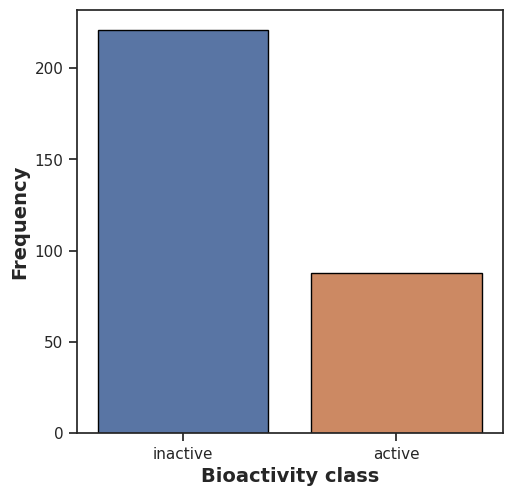

In [26]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity', data=df_final, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

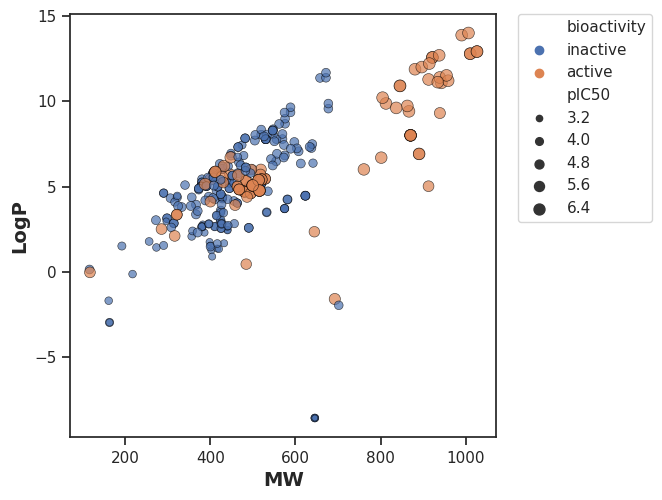

In [27]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_final, hue='bioactivity', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

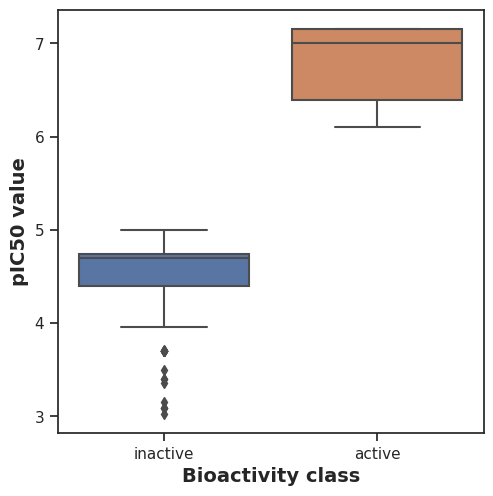

In [28]:

plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity', y = 'pIC50', data = df_final)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')


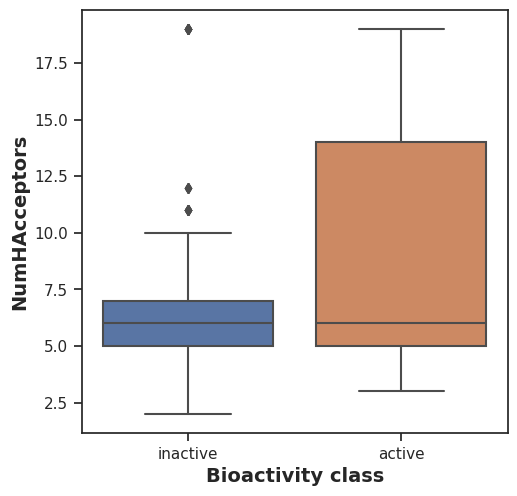

In [29]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity', y = 'NumHAcceptors', data = df_final)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [30]:

! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2023-10-22 09:01:47--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2023-10-22 09:01:47--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip’

padel.zip           100%[===================>]  24.57M  --.-KB/s    in 0.1s    

2023-10-22 09:01:49 (167 MB/s) - ‘padel.zip’ saved [25768637/25768637]

--2023-10-22 09:01:49--  https://github

In [31]:
! unzip padel.zip

Archive:  padel.zip
   creating: PaDEL-Descriptor/
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
   creating: PaDEL-Descriptor/license/
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config  
  inf

In [32]:
selection = ['canonical_smiles','molecule_chembl_id']
df3_selection = df_final[selection]
df3_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [33]:
! bash padel.sh

Processing CHEMBL404271 in molecule.smi (1/309). 
Processing CHEMBL4162593 in molecule.smi (2/309). 
Processing CHEMBL4212935 in molecule.smi (3/309). Average speed: 3.67 s/mol.
Processing CHEMBL4072055 in molecule.smi (4/309). Average speed: 2.79 s/mol.
Processing CHEMBL4208759 in molecule.smi (5/309). Average speed: 2.29 s/mol.
Processing CHEMBL3601736 in molecule.smi (6/309). Average speed: 2.31 s/mol.
Processing CHEMBL2331563 in molecule.smi (8/309). Average speed: 1.86 s/mol.
Processing CHEMBL4217611 in molecule.smi (7/309). Average speed: 2.07 s/mol.
Processing CHEMBL4215150 in molecule.smi (9/309). Average speed: 1.61 s/mol.
Processing CHEMBL4213032 in molecule.smi (11/309). Average speed: 1.38 s/mol.
Processing CHEMBL4216309 in molecule.smi (10/309). Average speed: 1.55 s/mol.
Processing CHEMBL4212356 in molecule.smi (12/309). Average speed: 1.34 s/mol.
Processing CHEMBL4208620 in molecule.smi (13/309). Average speed: 1.23 s/mol.
Processing CHEMBL4213599 in molecule.smi (14/309

In [34]:
df3_X = pd.read_csv('descriptors_output.csv')
df3_X = df3_X.drop(columns=['Name'])
df3_X.shape

(309, 881)

In [35]:
df3_Y=df_final['pIC50']

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))

In [39]:
X = selection.fit_transform(df3_X)

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(df3_X,df3_Y, test_size=0.2)


In [41]:
model = GradientBoostingRegressor()
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2


0.8399526865957169

In [42]:
Y_pred = model.predict(X_test)

In [43]:
!pip install lazypredict
from lazypredict.Supervised import LazyRegressor

In [44]:
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 42/42 [01:09<00:00,  1.67s/it]


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001134 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 951
[LightGBM] [Info] Number of data points in the train set: 247, number of used features: 317
[LightGBM] [Info] Start training from score 5.148278
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

100%|██████████| 42/42 [00:48<00:00,  1.15s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000784 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 951
[LightGBM] [Info] Number of data points in the train set: 247, number of used features: 317
[LightGBM] [Info] Start training from score 5.148278
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

In [45]:
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Lars,203432697.92,-525120984.94,25293.11,0.43
SGDRegressor,52440095.15,-135363656.67,12841.73,0.13
KernelRidge,9.46,-20.84,5.16,0.08
DummyRegressor,1.39,0.00,1.10,0.04
LassoLars,1.39,0.00,1.10,0.11
Lasso,1.39,0.00,1.10,0.08
ElasticNet,1.30,0.23,0.97,0.05
LarsCV,1.19,0.50,0.78,2.54
AdaBoostRegressor,1.09,0.78,0.52,0.09


In [46]:
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Lars,662343796317640285644994379776.00,-8903637917712541756995808526336.00,3358417982504316.00,0.41
LinearRegression,35960034169947447885824.00,-483397180645195196137472.00,782533715190.17,0.08
TransformedTargetRegressor,35960034169947447885824.00,-483397180645195196137472.00,782533715190.17,0.08
SGDRegressor,13480033.24,-181206989.76,15150.90,0.09
KernelRidge,2.63,-20.93,5.27,0.08
GaussianProcessRegressor,2.43,-18.29,4.94,0.19
Lasso,1.07,-0.00,1.13,0.12
LassoLars,1.07,-0.00,1.13,0.05
DummyRegressor,1.07,-0.00,1.13,0.03


In [47]:
import pickle

In [48]:
pickle.dump(model,open("diabetes.pkl","wb"))

In [49]:
!zip -r /content/file.zip /content/

  adding: content/ (stored 0%)
  adding: content/.config/ (stored 0%)
  adding: content/.config/config_sentinel (stored 0%)
  adding: content/.config/default_configs.db (deflated 98%)
  adding: content/.config/.last_opt_in_prompt.yaml (stored 0%)
  adding: content/.config/.last_survey_prompt.yaml (stored 0%)
  adding: content/.config/gce (stored 0%)
  adding: content/.config/logs/ (stored 0%)
  adding: content/.config/logs/2023.10.19/ (stored 0%)
  adding: content/.config/logs/2023.10.19/16.35.29.191125.log (deflated 58%)
  adding: content/.config/logs/2023.10.19/16.35.01.818235.log (deflated 58%)
  adding: content/.config/logs/2023.10.19/16.35.41.058852.log (deflated 57%)
  adding: content/.config/logs/2023.10.19/16.35.41.935274.log (deflated 56%)
  adding: content/.config/logs/2023.10.19/16.34.30.879676.log (deflated 91%)
  adding: content/.config/logs/2023.10.19/16.35.13.977190.log (deflated 86%)
  adding: content/.config/active_config (stored 0%)
  adding: content/.config/configura

In [50]:
import session_info
session_info.show()

ModuleNotFoundError: ignored